In [5]:
from utils import gen_dataset
from utils import treine
from utils import Eval_metric
from utils import predict
import torch
from modelo import Linear
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import sys as s
import warnings
warnings.filterwarnings('ignore')

### Entenda o dataset usando a função gen_dataset(proportion, explanation)

Rodando a função obten-se uma explicação de como salvamos através de pickle os objetos de treino e teste:

$$\begin{cases}
&TREINO:\begin{cases}&INPUT\_TRAIN\\&TRAIN\_LABELS\end{cases}\\
&TESTE:\begin{cases}&{INPUT\_TEST}\\&TEST\_LABELS\end{cases}
\end{cases}
$$

In [2]:
Input, Output, Input_test, Output_test = gen_dataset(5, True)


Nosso dataset possui 45 gráficos que representam o sinal de uma célula até completar a mitose
Cada gráfico gera dois exemplos de treino, então o nosso dataset tem tamanho 90. 
Separando o dataset por um dado de entrada (Input) e um valor correto de saída (Output) :
np.shape(Input) =  (50, 30) : os 50 primeiros gráficos de intervalo  30.
np.shape(Output) =  (50,) : o vetor de 50 valores corretos, que segundo a organização do dataset, é composto de [0,1,0,1,...]
np.shape(Input_Test) (40, 30) : os últimos 40 gráficos de intervalo  30.
np.shape(Output_Test) (40,) : o vetor de 40 valores corretos é composto de [0,1,0,1,...]
Separando o dataset em grupos de 10, ou seja, batch_size = 10. O dataset fica pronto para realizar o treino
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_Test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])
Por exemplo, inp[0][0] representa os primeiros 30 pontos e inp[0][1] os últimos 30 pontos do mesmo gráfico


In [9]:
def eval_model(proportion,epochs):
    y1 = []
    y2 = []
    _, _, inp, out = gen_dataset(proportion, False)
    model = Linear()
    #erro, acerto = Eval_metric(model, 'test')
    #print('antes de treinar o modelo acertou {} do conjunto de teste'.format(acerto))
    #print('antes de treinar o modelo errou {} do conjunto de teste'.format(erro))
    erro,acerto,Epochs = treine(model, epochs)
    plt.plot(Epochs, erro, label='erro')
    plt.plot(Epochs, acerto, label='acerto')
    plt.legend()
    plt.xlabel('Epocas de treino')
    plt.suptitle('Porcentagens de erros e acertos treinando com {} exemplos'.format((proportion)*10))
    plt.title('Nesse gráfico foi usado os restantes {} exemplos de teste'.format((9-proportion)*10))
    plt.show()


após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.5857142857142857 do conjunto de teste
após 40 epocas de treino,  acertou 0.7142857142857143 do conjunto de teste
após 60 epocas de treino,  acertou 0.5714285714285714 do conjunto de teste
após 80 epocas de treino,  acertou 0.6285714285714286 do conjunto de teste
após 100 epocas de treino,  acertou 0.6428571428571429 do conjunto de teste
após 120 epocas de treino,  acertou 0.6857142857142857 do conjunto de teste
após 140 epocas de treino,  acertou 0.6571428571428571 do conjunto de teste
após 160 epocas de treino,  acertou 0.6571428571428571 do conjunto de teste
após 180 epocas de treino,  acertou 0.6142857142857143 do conjunto de teste
após 200 epocas de treino,  acertou 0.5857142857142857 do conjunto de teste
após 220 epocas de treino,  acertou 0.6142857142857143 do conjunto de teste
após 240 epocas de treino,  acertou 0.6 do conjunto de teste
após 260 epocas de treino,  acertou 0.5714285714

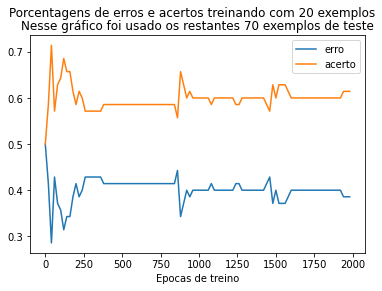

In [10]:
eval_model(2,2000)

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.55 do conjunto de teste
após 40 epocas de treino,  acertou 0.6 do conjunto de teste
após 60 epocas de treino,  acertou 0.65 do conjunto de teste
após 80 epocas de treino,  acertou 0.65 do conjunto de teste
após 100 epocas de treino,  acertou 0.65 do conjunto de teste
após 120 epocas de treino,  acertou 0.6 do conjunto de teste
após 140 epocas de treino,  acertou 0.6 do conjunto de teste
após 160 epocas de treino,  acertou 0.6 do conjunto de teste
após 180 epocas de treino,  acertou 0.7 do conjunto de teste
após 200 epocas de treino,  acertou 0.6 do conjunto de teste
após 220 epocas de treino,  acertou 0.6 do conjunto de teste
após 240 epocas de treino,  acertou 0.65 do conjunto de teste
após 260 epocas de treino,  acertou 0.7 do conjunto de teste
após 280 epocas de treino,  acertou 0.7 do conjunto de teste
após 300 epocas de treino,  acertou 0.7 do conjunto de teste
após 320 epocas de treino

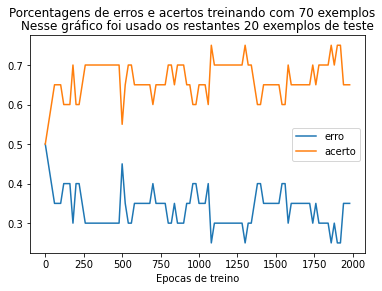

In [11]:
eval_model(7,2000)

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.6875 do conjunto de teste
após 40 epocas de treino,  acertou 0.6625 do conjunto de teste
após 60 epocas de treino,  acertou 0.725 do conjunto de teste
após 80 epocas de treino,  acertou 0.7125 do conjunto de teste
após 100 epocas de treino,  acertou 0.6875 do conjunto de teste
após 120 epocas de treino,  acertou 0.6875 do conjunto de teste
após 140 epocas de treino,  acertou 0.625 do conjunto de teste
após 160 epocas de treino,  acertou 0.6125 do conjunto de teste
após 180 epocas de treino,  acertou 0.5875 do conjunto de teste


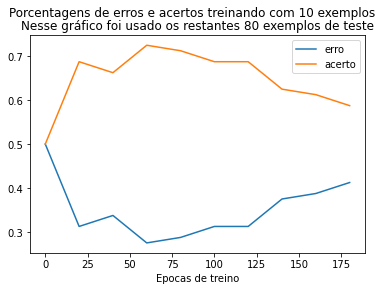

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.5857142857142857 do conjunto de teste
após 40 epocas de treino,  acertou 0.6285714285714286 do conjunto de teste
após 60 epocas de treino,  acertou 0.5571428571428572 do conjunto de teste
após 80 epocas de treino,  acertou 0.6571428571428571 do conjunto de teste
após 100 epocas de treino,  acertou 0.6 do conjunto de teste
após 120 epocas de treino,  acertou 0.5857142857142857 do conjunto de teste
após 140 epocas de treino,  acertou 0.5857142857142857 do conjunto de teste
após 160 epocas de treino,  acertou 0.5571428571428572 do conjunto de teste
após 180 epocas de treino,  acertou 0.5714285714285714 do conjunto de teste


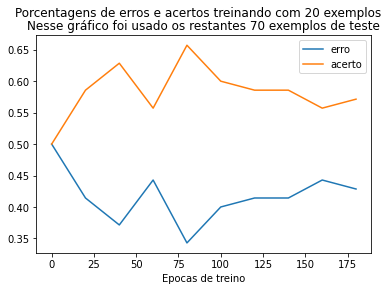

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.6 do conjunto de teste
após 40 epocas de treino,  acertou 0.5166666666666667 do conjunto de teste
após 60 epocas de treino,  acertou 0.5333333333333333 do conjunto de teste
após 80 epocas de treino,  acertou 0.55 do conjunto de teste
após 100 epocas de treino,  acertou 0.55 do conjunto de teste
após 120 epocas de treino,  acertou 0.55 do conjunto de teste
após 140 epocas de treino,  acertou 0.55 do conjunto de teste
após 160 epocas de treino,  acertou 0.55 do conjunto de teste
após 180 epocas de treino,  acertou 0.55 do conjunto de teste


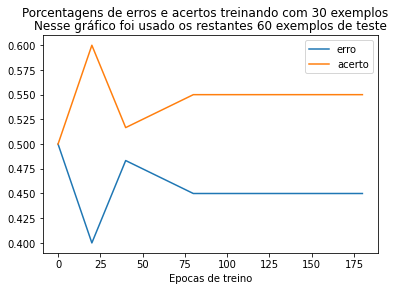

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.62 do conjunto de teste
após 40 epocas de treino,  acertou 0.56 do conjunto de teste
após 60 epocas de treino,  acertou 0.68 do conjunto de teste
após 80 epocas de treino,  acertou 0.68 do conjunto de teste
após 100 epocas de treino,  acertou 0.6 do conjunto de teste
após 120 epocas de treino,  acertou 0.64 do conjunto de teste
após 140 epocas de treino,  acertou 0.6 do conjunto de teste
após 160 epocas de treino,  acertou 0.64 do conjunto de teste
após 180 epocas de treino,  acertou 0.64 do conjunto de teste


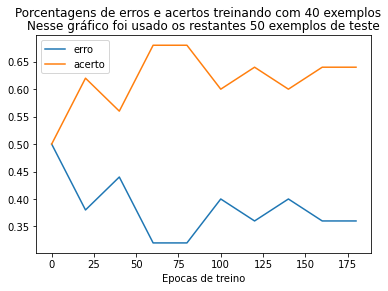

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.575 do conjunto de teste
após 40 epocas de treino,  acertou 0.675 do conjunto de teste
após 60 epocas de treino,  acertou 0.725 do conjunto de teste
após 80 epocas de treino,  acertou 0.7 do conjunto de teste
após 100 epocas de treino,  acertou 0.725 do conjunto de teste
após 120 epocas de treino,  acertou 0.65 do conjunto de teste
após 140 epocas de treino,  acertou 0.725 do conjunto de teste
após 160 epocas de treino,  acertou 0.725 do conjunto de teste
após 180 epocas de treino,  acertou 0.675 do conjunto de teste


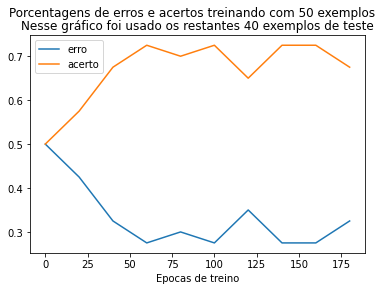

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.5333333333333333 do conjunto de teste
após 40 epocas de treino,  acertou 0.6666666666666666 do conjunto de teste
após 60 epocas de treino,  acertou 0.5666666666666667 do conjunto de teste
após 80 epocas de treino,  acertou 0.7 do conjunto de teste
após 100 epocas de treino,  acertou 0.7 do conjunto de teste
após 120 epocas de treino,  acertou 0.6 do conjunto de teste
após 140 epocas de treino,  acertou 0.6 do conjunto de teste
após 160 epocas de treino,  acertou 0.7 do conjunto de teste
após 180 epocas de treino,  acertou 0.7333333333333333 do conjunto de teste


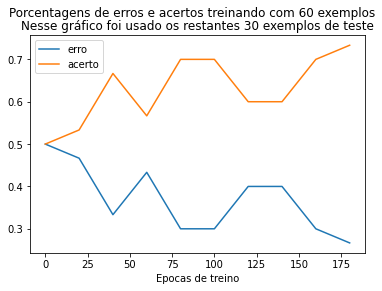

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.65 do conjunto de teste
após 40 epocas de treino,  acertou 0.65 do conjunto de teste
após 60 epocas de treino,  acertou 0.65 do conjunto de teste
após 80 epocas de treino,  acertou 0.7 do conjunto de teste
após 100 epocas de treino,  acertou 0.7 do conjunto de teste
após 120 epocas de treino,  acertou 0.65 do conjunto de teste
após 140 epocas de treino,  acertou 0.6 do conjunto de teste
após 160 epocas de treino,  acertou 0.65 do conjunto de teste
após 180 epocas de treino,  acertou 0.6 do conjunto de teste


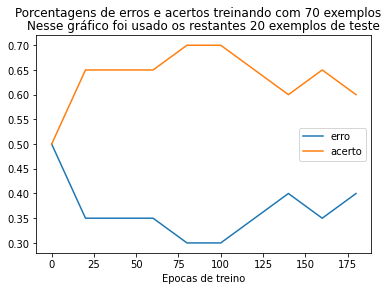

após 0 epocas de treino,  acertou 0.5 do conjunto de teste
após 20 epocas de treino,  acertou 0.6 do conjunto de teste
após 40 epocas de treino,  acertou 0.7 do conjunto de teste
após 60 epocas de treino,  acertou 0.8 do conjunto de teste
após 80 epocas de treino,  acertou 0.7 do conjunto de teste
após 100 epocas de treino,  acertou 0.5 do conjunto de teste
após 120 epocas de treino,  acertou 0.6 do conjunto de teste
após 140 epocas de treino,  acertou 0.5 do conjunto de teste
após 160 epocas de treino,  acertou 0.7 do conjunto de teste
após 180 epocas de treino,  acertou 0.6 do conjunto de teste


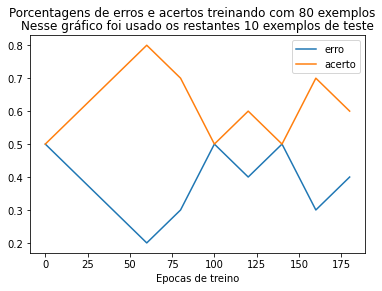

In [12]:
for i in range(1, 9):
    eval_model(i,200)